In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
path  = os.getcwd()
print(path)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_23_RFM_analysis


In [2]:
retail = pd.read_csv("{0}/retail_clean.csv".format(path))

In [3]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date'] = pd.to_datetime(retail['date'])

In [9]:
# recency
max_date = retail['date'].max()

In [5]:
retail.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date'],
      dtype='object')

In [6]:
customers_recency = retail.groupby('Customer ID').agg(last_date = ('date', 'max')).reset_index()

In [7]:
customers_recency['recency'] = max_date - customers_recency['last_date']
customers_recency['recency'] = customers_recency['recency'].astype('string').str.replace('days', '').astype(int)

In [8]:
customers_recency['recency']

0       325
1         2
2        75
3        18
4       310
       ... 
5876      3
5877    431
5878    660
5879    476
5880     42
Name: recency, Length: 5881, dtype: int64

In [10]:
### frequency

In [11]:
freq2 = retail.groupby('Customer ID').date.count().reset_index()
freq2.columns = ['Customer ID', 'frequency']

In [12]:
freq2

,Customer ID,frequency
0,12346.0,34
1,12347.0,222
2,12348.0,51
3,12349.0,175
4,12350.0,17
...,...,...
5876,18283.0,938
5877,18284.0,28
5878,18285.0,12
5879,18286.0,67


In [13]:
### Monetary value

In [14]:
retail.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date'],
      dtype='object')

In [15]:
monet1 = retail.groupby(['Customer ID', 'Invoice']).agg(revenue = ('Revenue', 'sum')).reset_index()

In [16]:
monet2 = monet1.groupby('Customer ID').agg(monetary = ('revenue', 'mean')).reset_index()

In [18]:
customers_recency['rank_recency'] = customers_recency['recency'].rank(pct=True)

In [19]:
freq2['freq_ranking'] = freq2['frequency'].rank(ascending=False, pct=True)
monet2['rank_monet'] = monet2['monetary'].rank(ascending=False, pct=True)

In [20]:
all_data = pd.merge(customers_recency, freq2, how='left', on='Customer ID')
all_data = pd.merge(all_data, monet2, how='left', on='Customer ID')

In [23]:
bins = [0,0.5,1]
names = ['1', '2']

In [24]:
final = pd.DataFrame(customers_recency['Customer ID'])
final['frequency'] = pd.cut(freq2['freq_ranking'], bins, labels=names).astype('string')
final['recency'] = pd.cut(customers_recency['rank_recency'], bins, labels=names).astype('string')
final['monetary'] = pd.cut(monet2['rank_monet'], bins, labels=names).astype('string')

In [25]:
final['rec_freq_mone'] = final['recency'] + final['frequency'] + final['monetary']

In [26]:
all_data['rec_freq_monet'] = final['rec_freq_mone']
all_data.to_csv('rfm.csv')

In [27]:
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet
0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,221
1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,0.106104,111
2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,0.263051,121
3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,0.028567,111
4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,0.375446,221
...,...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,938,0.014708,121.131818,0.892365,112
5877,18284.0,2010-10-04,431,0.831406,28,0.674545,461.680000,0.199456,221
5878,18285.0,2010-02-17,660,0.967267,12,0.851301,427.000000,0.235504,221
5879,18286.0,2010-08-20,476,0.868730,67,0.430539,648.215000,0.095732,211


In [28]:
import seaborn as sns

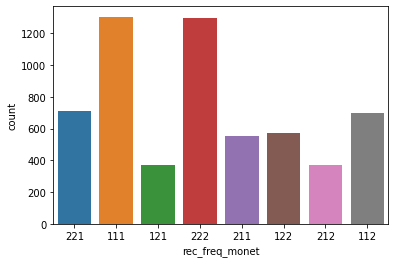

In [30]:
fig = sns.countplot(x='rec_freq_monet', data= all_data)